In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import umap

In [2]:
def prepare_data(funcs, noise):
    data = []
    for func in funcs:
        t = np.random.randn(100)
        x = np.stack([f(t) for f in func])
        x += np.random.randn(len(func), 100) * noise
        data.append(x)
    return np.concatenate(data, axis = 1)

In [3]:
def plot_UMAP(funcs, colors, noise):
    X = prepare_data(funcs, noise)
    print(X.shape)
    
    model = umap.UMAP(n_components=2)
    X_umap = model.fit_transform(X.T)
    print(model.transform([[-3.3, -1.8, -1.8]]))
            
    # Visualisation
    all_colors = []
    for color in colors:
        all_colors += [color] * 100
    plt.scatter(X_umap[:, 0], X_umap[:, 1], c = all_colors)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title("UMAP")
    plt.show()

(3, 300)
[[6.7159576 7.9252267]]


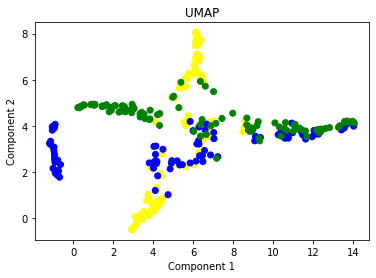

In [4]:
plot_UMAP([
        [
            lambda x: 2 * x - 1.3,
            lambda x: 2 * x + 0.2,
            lambda x: 2 * x + 0.2,    # same
        ],
        [
            lambda x: 2 * x - 0.5,
            lambda x: -2 * x + 1.1,
            lambda x: -2 * x + 1.1,   # same
        ],
        [
            lambda x: 3 * x - 1.5,
            lambda x: -1.5 * x + 0.5,
            lambda x: -1.5 * x + 0.5, # same
        ]
    ],
    ['yellow', 'blue', 'green'],
    0.5,
)

(3, 300)
[[-2.1645555  6.140861 ]]


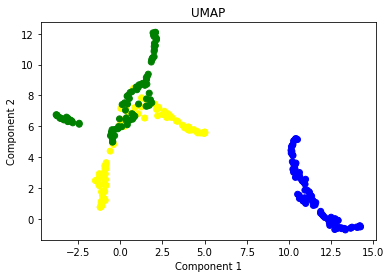

In [8]:
plot_UMAP([
        [
            lambda x: 2 * x - 1.3,
            lambda x: 2 * x + 0.2,
            lambda x: -3 * x + 0.2,
        ],
        [
            lambda x: 2 * x - 0.5,
            lambda x: -2 * x + 1.1,
            lambda x: 1.5 * x - 6.1,
        ],
        [
            lambda x: -3 * x - 1.5,
            lambda x: -1.5 * x + 0.5,
            lambda x: -2.7 * x - 0.2,
        ]
    ],
    ['yellow', 'blue', 'green'],
    0.5,
)

(3, 300)
[[ 9.29154 10.12566]]


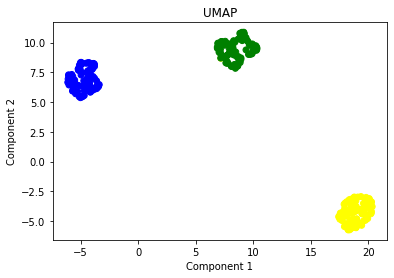

In [10]:
plot_UMAP([
        [
            lambda x: 0 * x - 1.3,
            lambda x: 0 * x + 0.2,
            lambda x: 0 * x + 0.2,
        ],
        [
            lambda x: 0 * x - 0.5,
            lambda x: 0 * x + 1.1,
            lambda x: 0 * x - 6.1,
        ],
        [
            lambda x: 0 * x - 1.5,
            lambda x: 0 * x + 0.5,
            lambda x: 0 * x - 0.2,
        ]
    ],
    ['yellow', 'blue', 'green'],
    0.1,
)